In [1]:
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

In [3]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-03\data\lev-03_merged.parquet"

pdf = pl.read_parquet(path)

In [4]:
mp_data = pdf.filter(
    pl.col('State') == '23'
)

mp_data['State'].unique()

State
str
"""23"""


In [5]:
lev_03_hh = ['HH_Size_FDQ', 'Household_Type',
            'Religion_of_HH_Head', 'Land_Ownership',
            'Type_of_Land_Owned','Total_Area_Land_Owned_Acres',
            'Energy_Source_Cooking', 'Energy_Source_Lighting',
            'Dwelling_Unit_Exists', 'Type_of_Dwelling_Unit',
            'Rent_Rate_Available_Rural', 'Multiplier']

lev_03_fin = [
    'Self_Employment_Source_Sector','Regular_Wage_Source_Sector',
    'Casual_Labour_Source_Sector']

lev_03_occupation = [
    'Engaged_in_Economic_Activity_Las',	'Max_Income_Activity']

lev_03_scheme = ['Benefitted_From_PMGKY']

In [6]:
lev_03_cols = (
    lev_03_hh
    + lev_03_fin
    + lev_03_occupation
    + lev_03_scheme
)

In [7]:
mp_data[lev_03_cols]

HH_Size_FDQ,Household_Type,Religion_of_HH_Head,Land_Ownership,Type_of_Land_Owned,Total_Area_Land_Owned_Acres,Energy_Source_Cooking,Energy_Source_Lighting,Dwelling_Unit_Exists,Type_of_Dwelling_Unit,Rent_Rate_Available_Rural,Multiplier,Self_Employment_Source_Sector,Regular_Wage_Source_Sector,Casual_Labour_Source_Sector,Engaged_in_Economic_Activity_Las,Max_Income_Activity,Benefitted_From_PMGKY
f64,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str
7.0,"""1""","""1""","""1""","""2""","""6.01""","""01""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""1""","""1""","""1"""
7.0,"""1""","""1""","""1""","""2""","""6.61""","""01""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""1""","""1""","""1"""
7.0,"""1""","""1""","""1""","""2""","""4.21""","""02""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""1""","""1""","""1"""
7.0,"""1""","""1""","""1""","""2""","""3.62""","""01""","""1""","""1""","""1""","""2""",58558.0,"""1""","""""","""""","""1""","""1""","""1"""
13.0,"""5""","""1""","""1""","""2""","""4.01""","""01""","""1""","""1""","""1""","""2""",58558.0,"""""","""""","""5""","""1""","""3""","""1"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
5.0,"""1""","""1""","""1""","""1""","""0.02""","""02""","""1""","""1""","""1""","""""",173023.0,"""""","""""","""""","""1""","""1""","""1"""
3.0,"""1""","""1""","""1""","""1""","""0.03""","""02""","""1""","""1""","""1""","""""",173023.0,"""""","""""","""""","""1""","""1""","""2"""
4.0,"""2""","""1""","""1""","""1""","""0.02""","""02""","""1""","""1""","""1""","""""",173023.0,"""""","""""","""""","""1""","""2""","""1"""


In [8]:
mp_df = mp_data.to_pandas()

C:\Users\Rudra\AppData\Roaming\Python\Python311\site-packages\scipy\cluster\hierarchy.py:2823: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])
C:\Users\Rudra\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\Users\Rudra\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


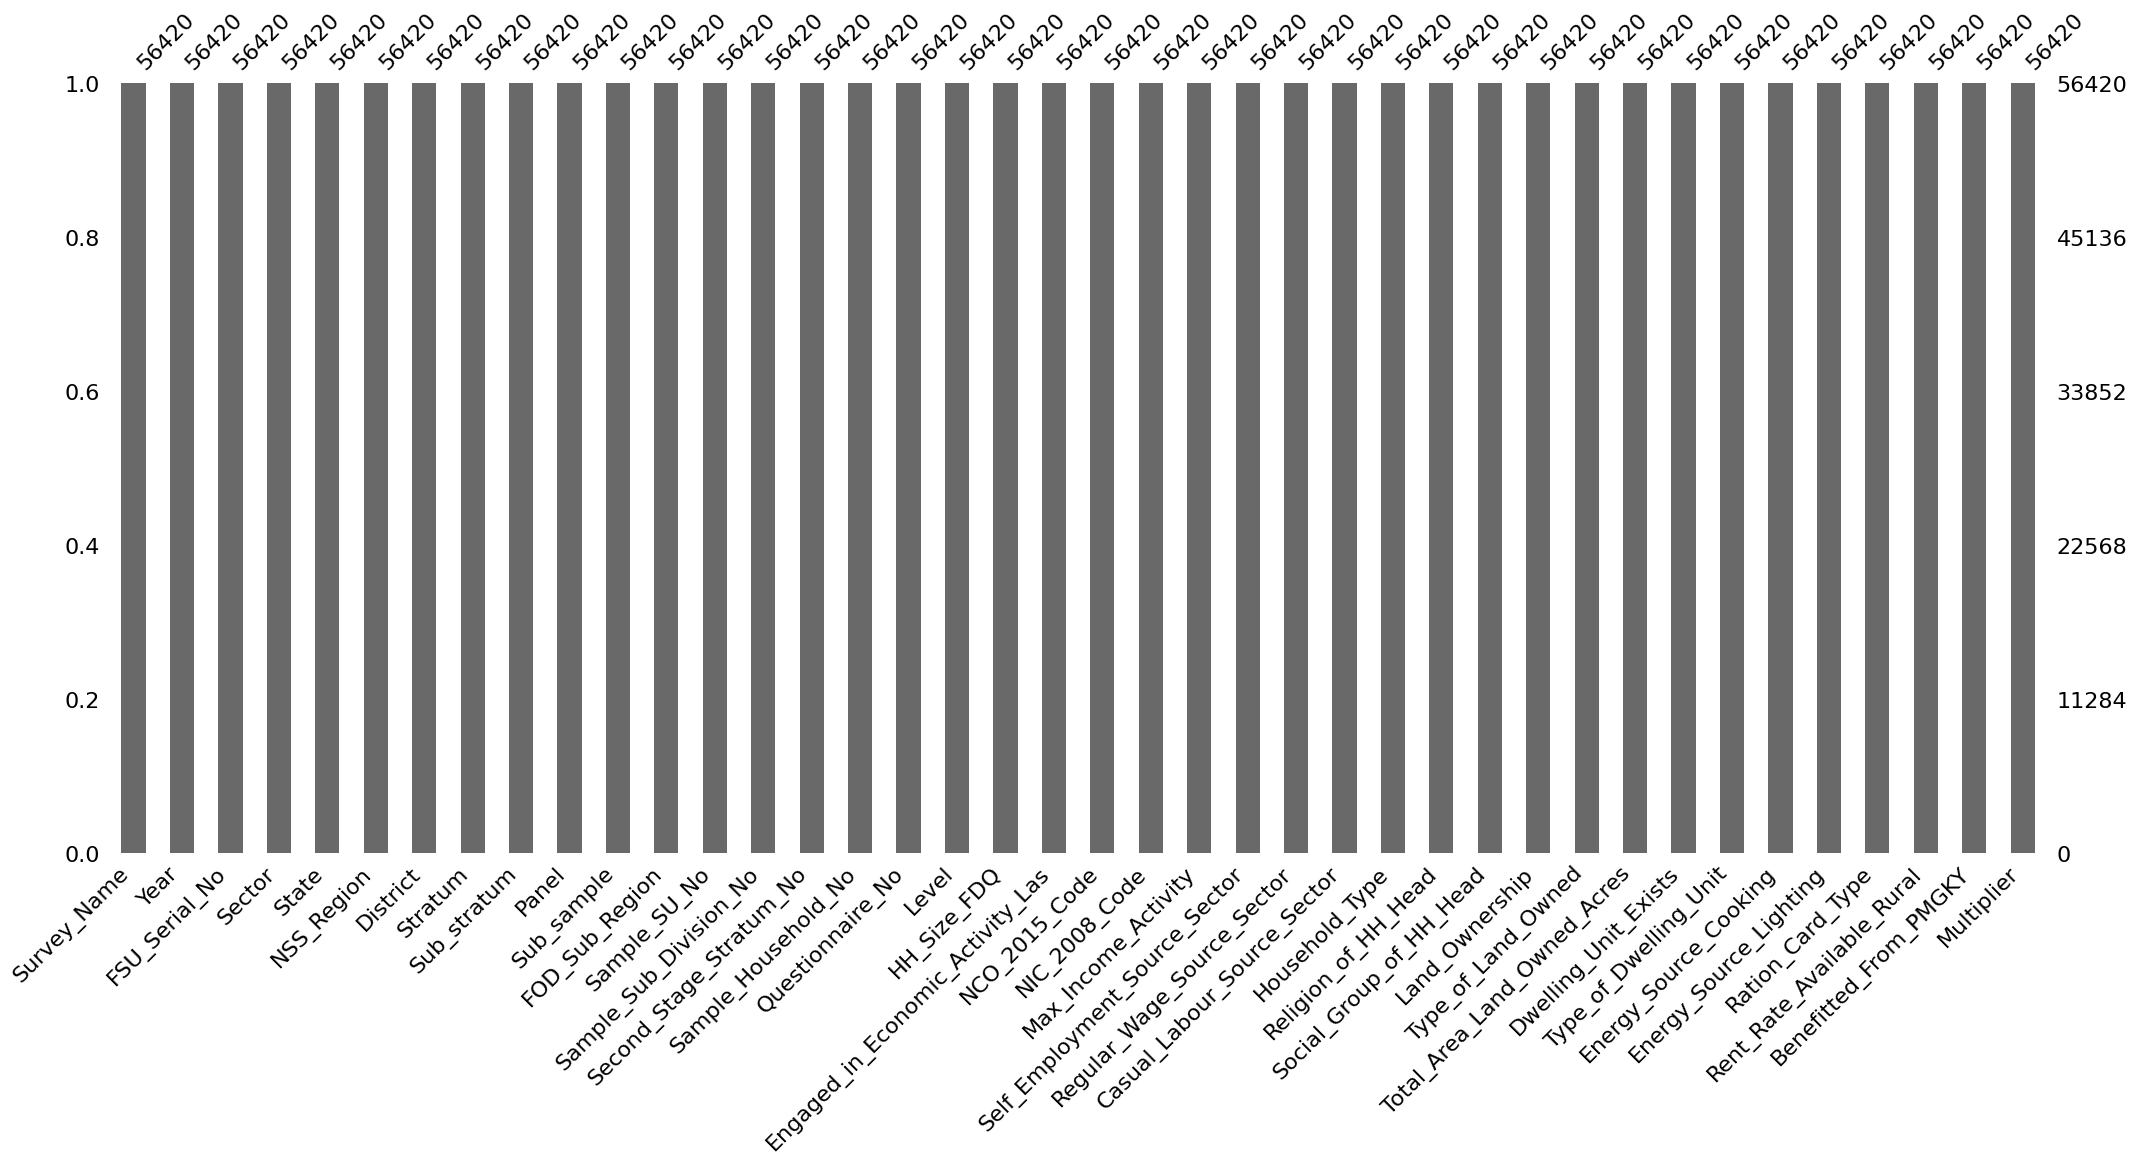

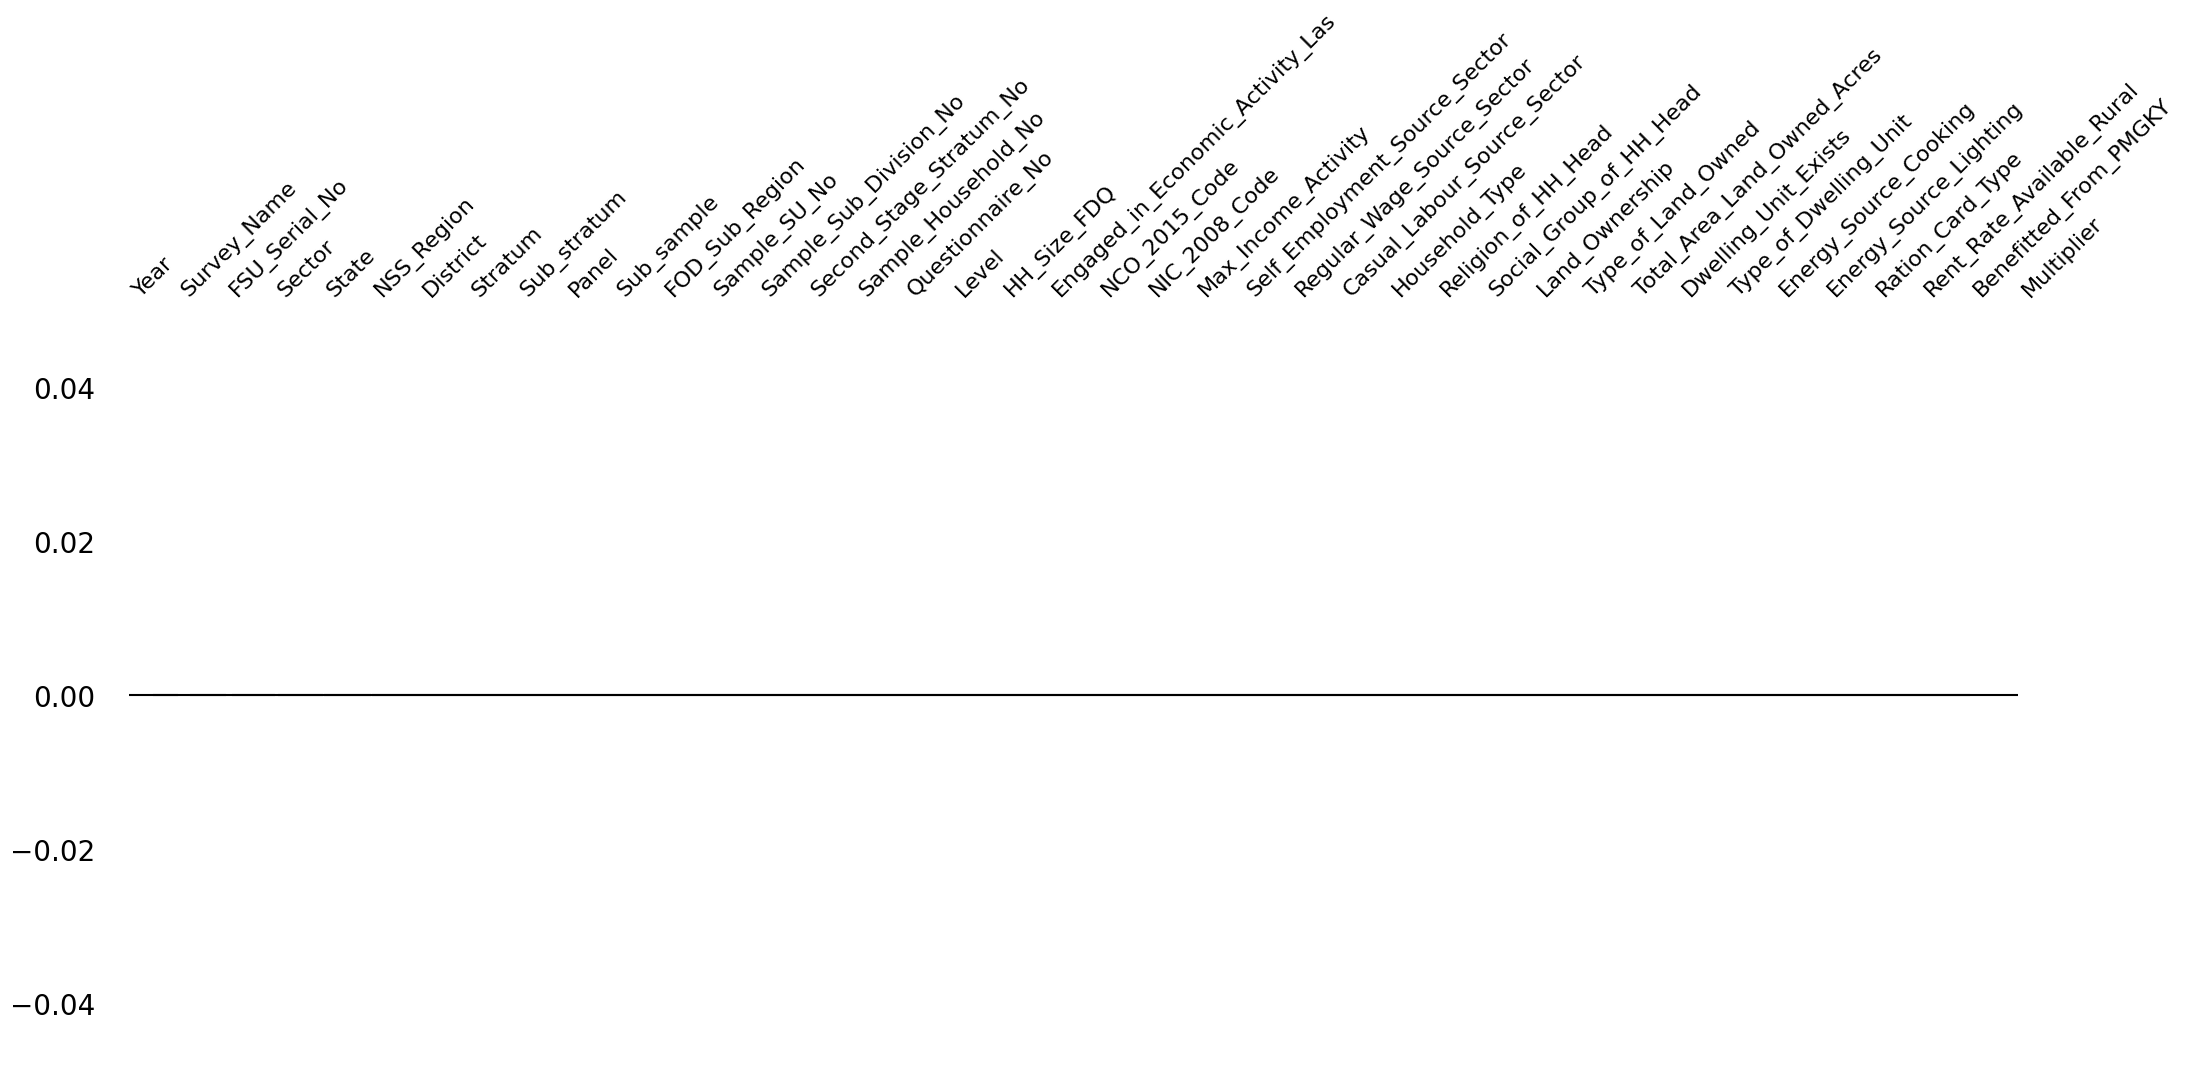

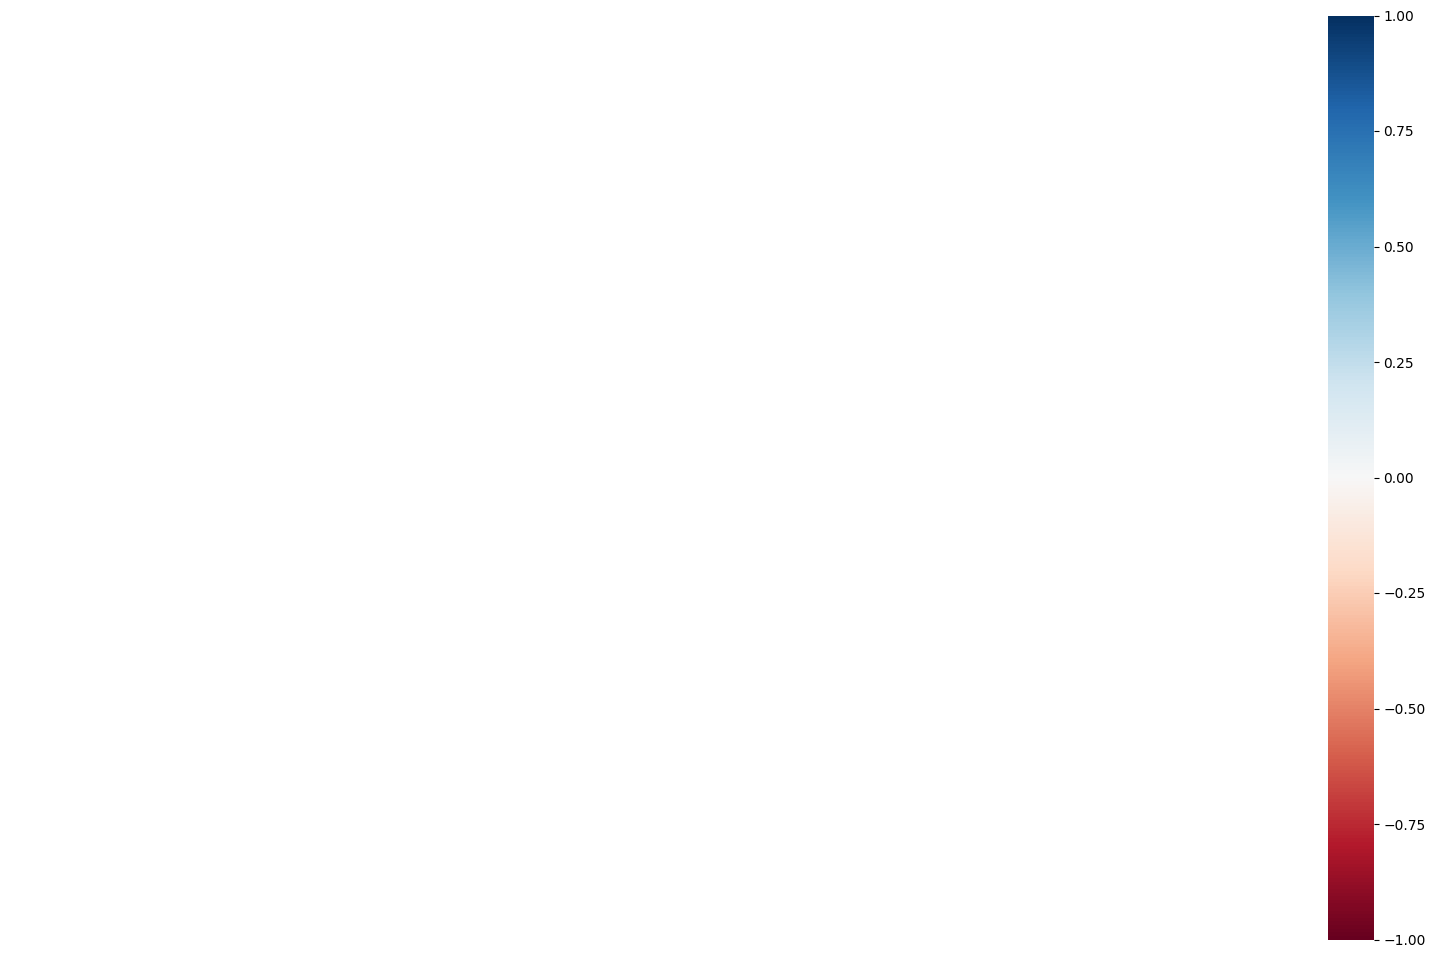

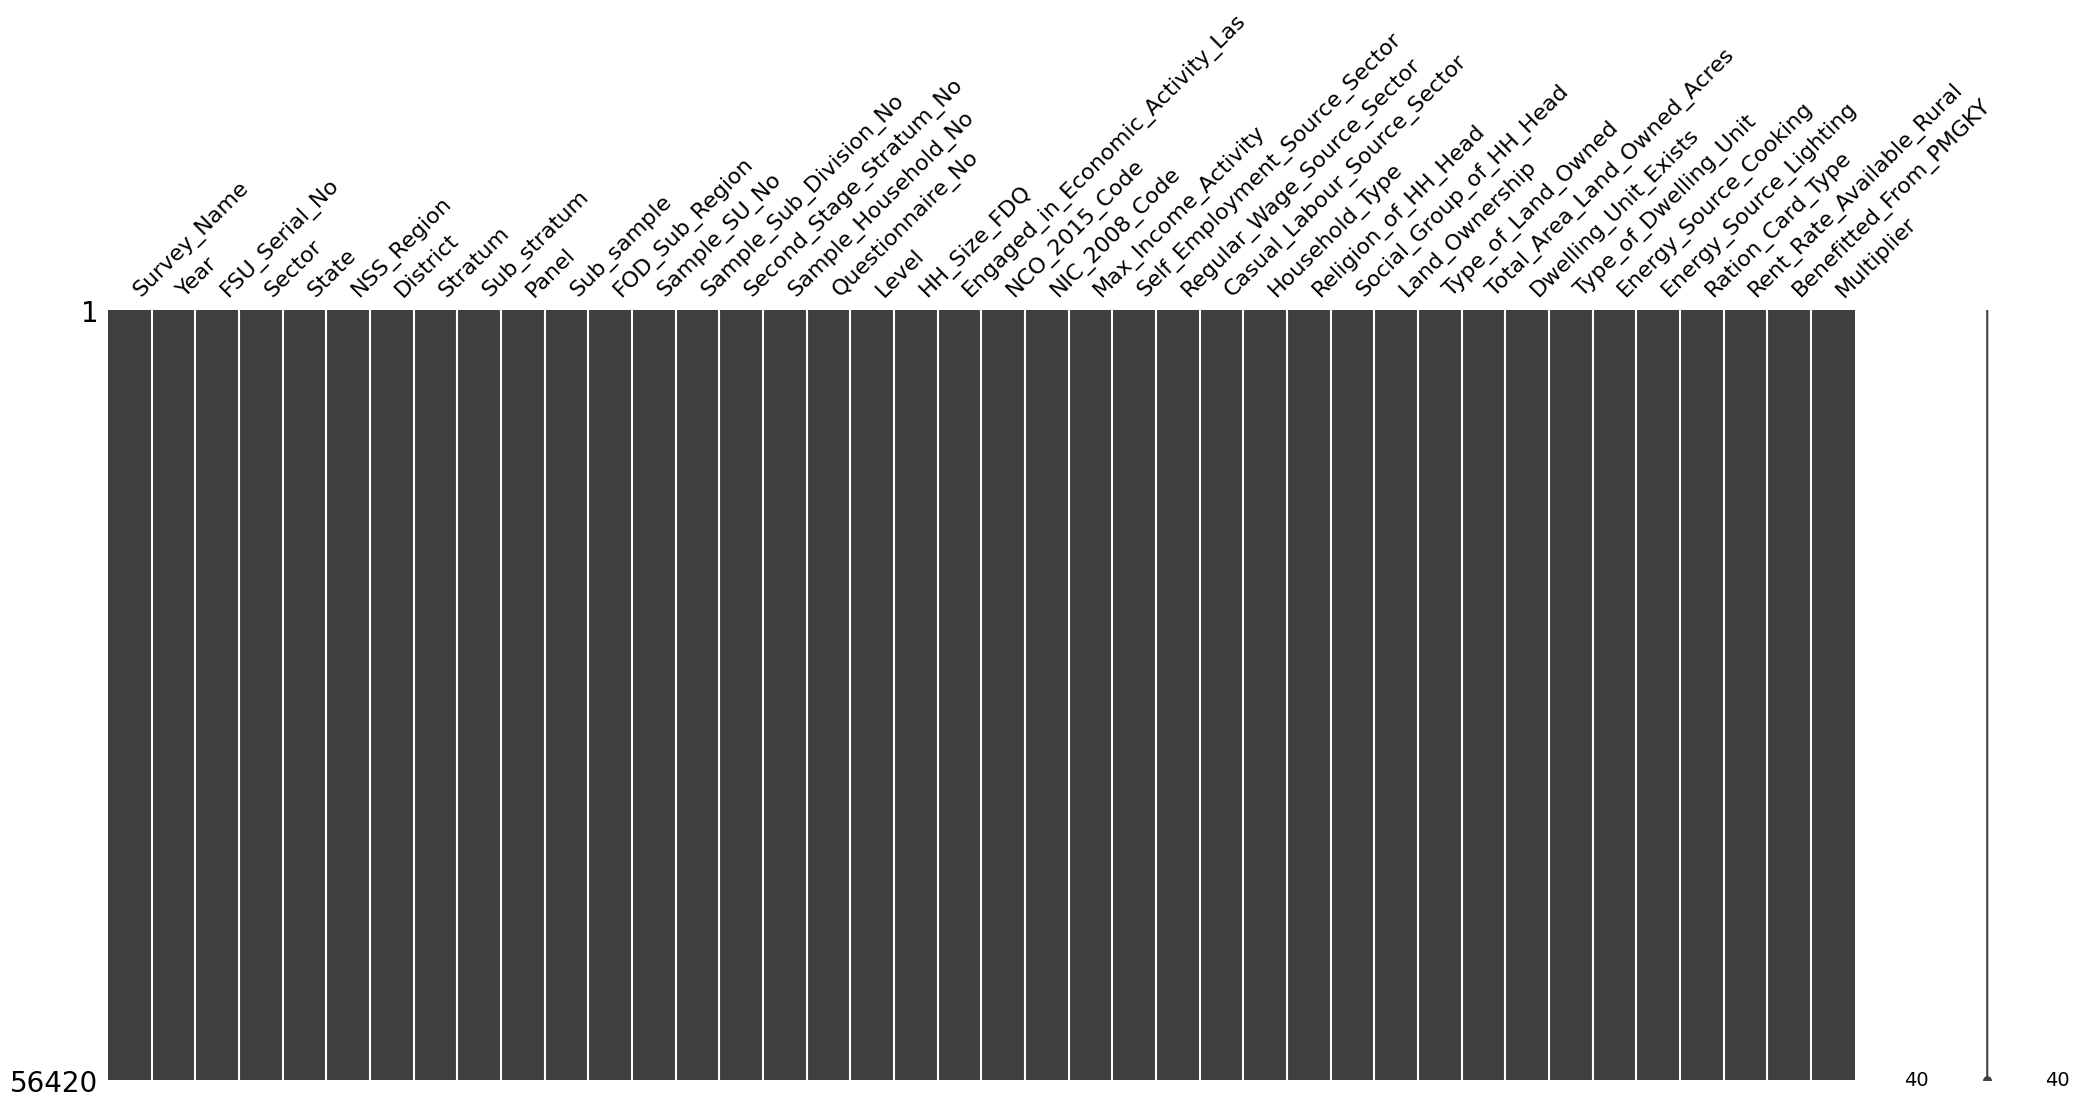

In [9]:
plot_null(mp_df)